<a href="https://colab.research.google.com/github/ShashwatSharma19/MNIST_CNN_Classifier/blob/main/basicneuralnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("number of training images: " + str(x_train.shape[0]))
print("number of test images: " + str(x_test.shape[0]))

number of training images: 60000
number of test images: 10000


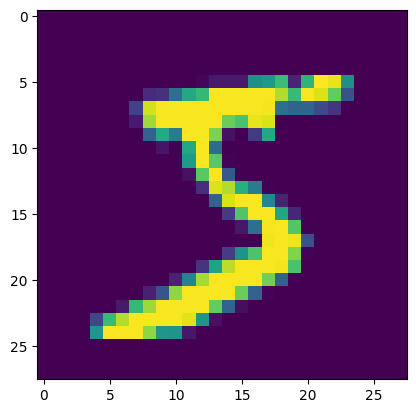

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

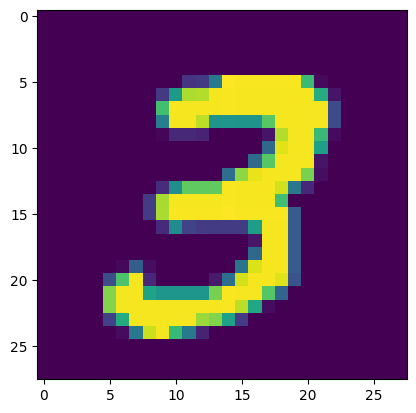

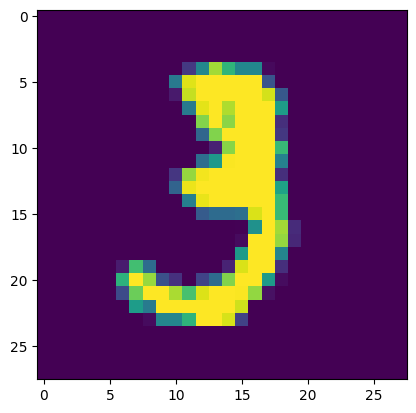

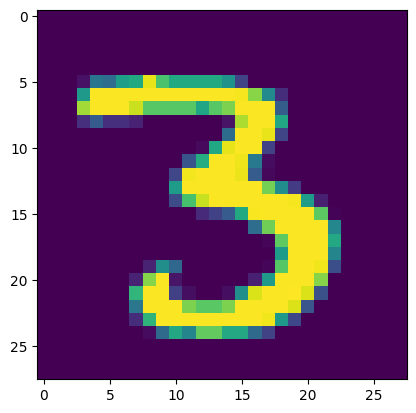

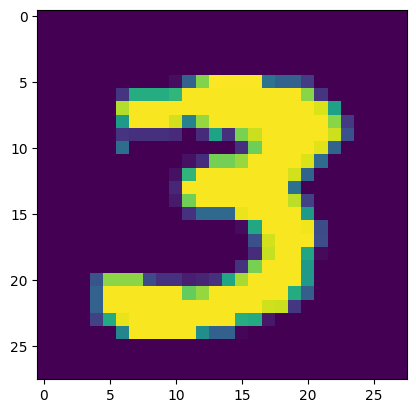

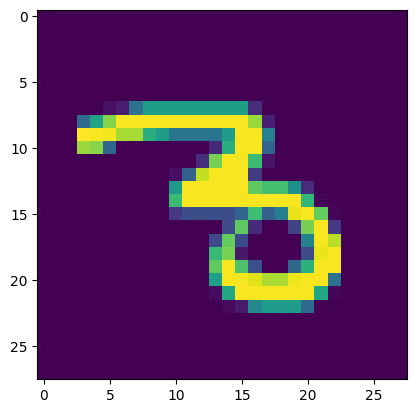

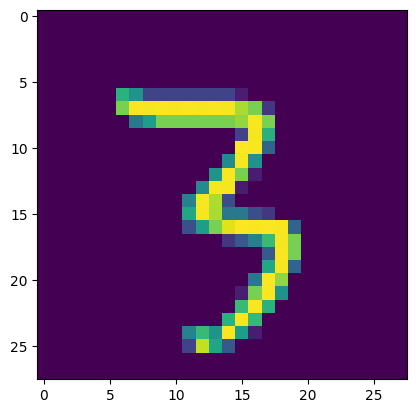

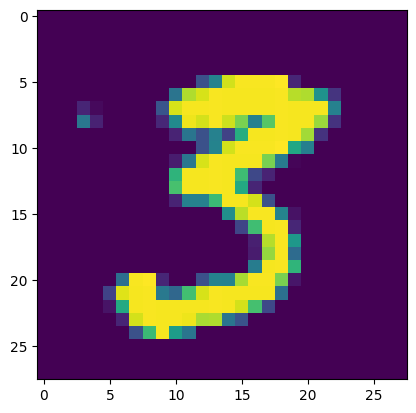

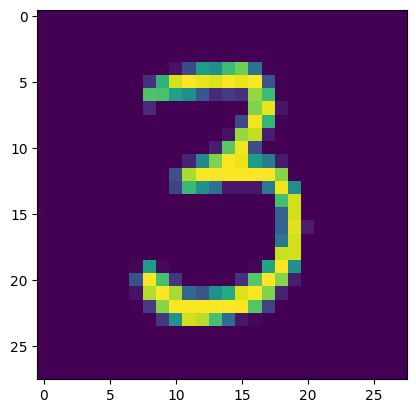

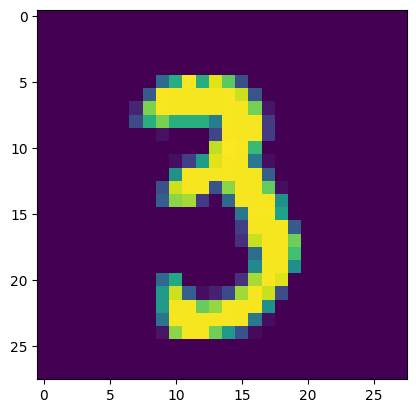

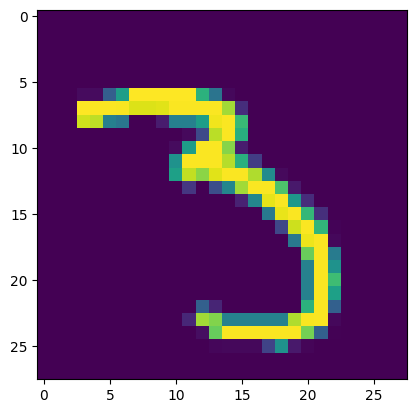

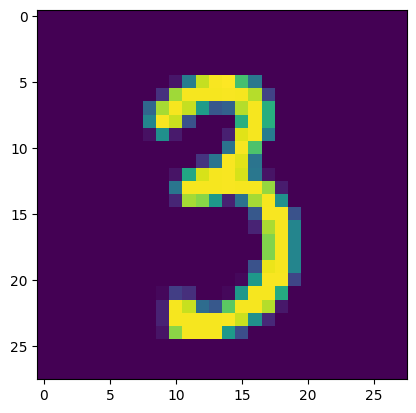

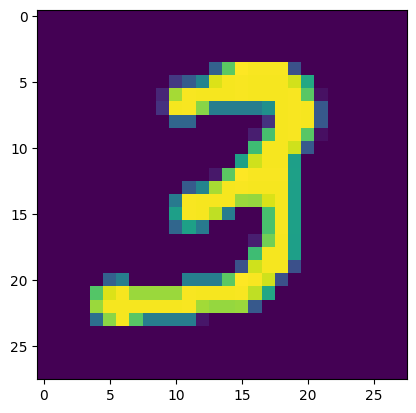

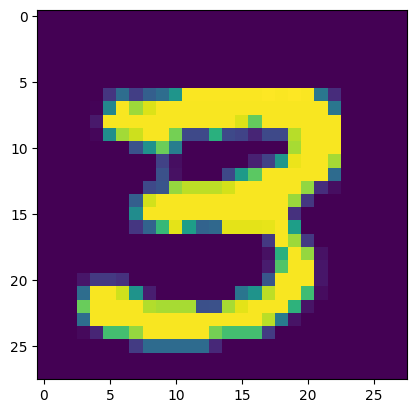

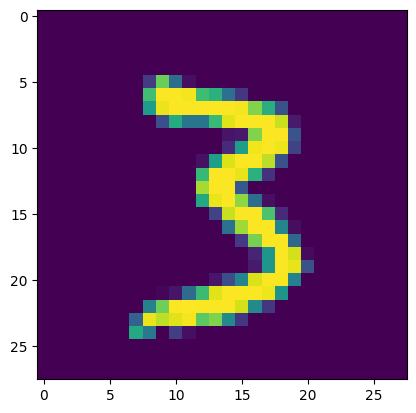

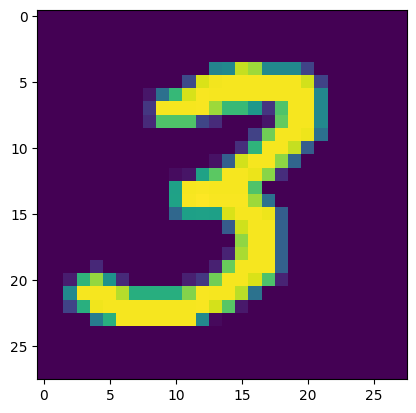

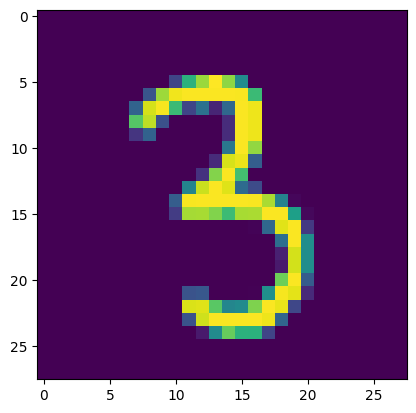

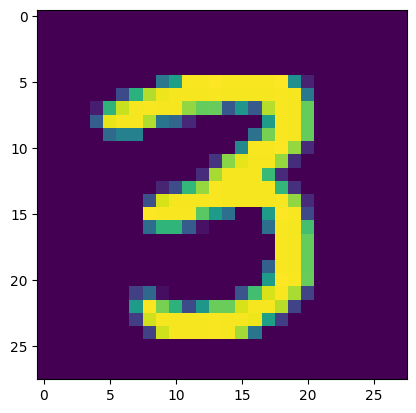

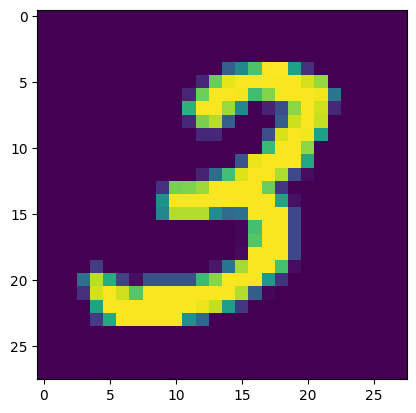

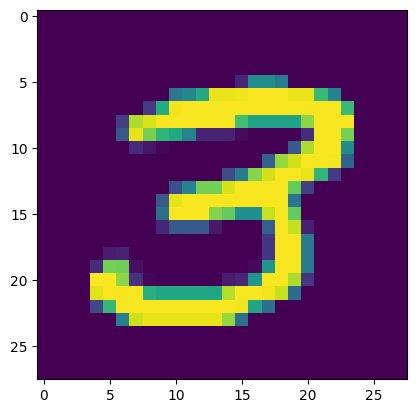

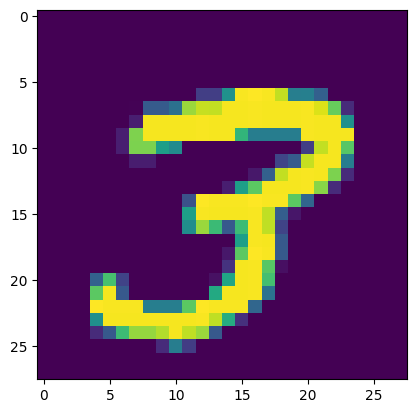

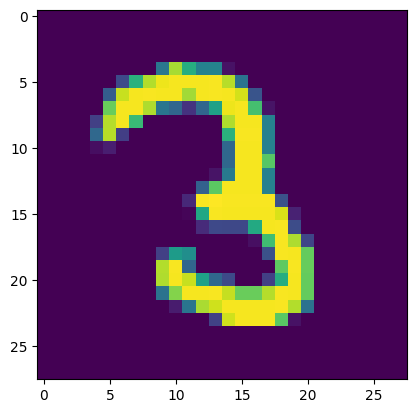

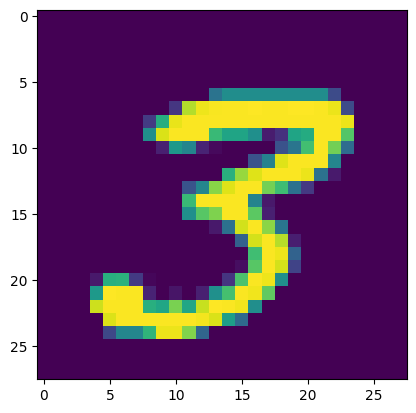

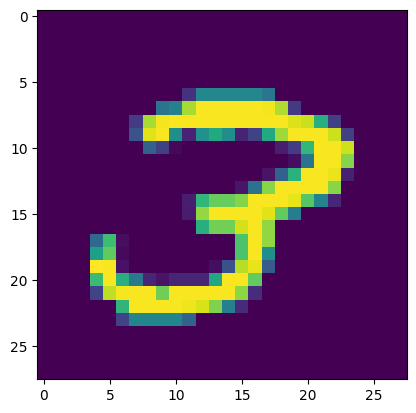

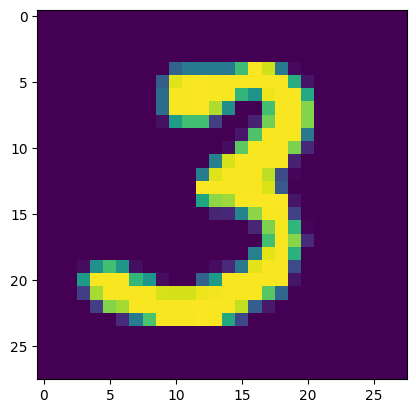

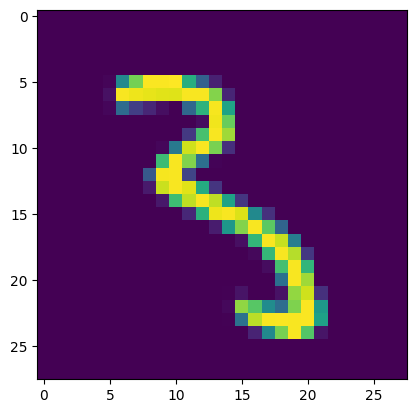

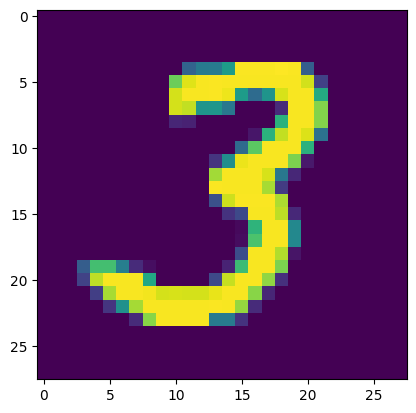

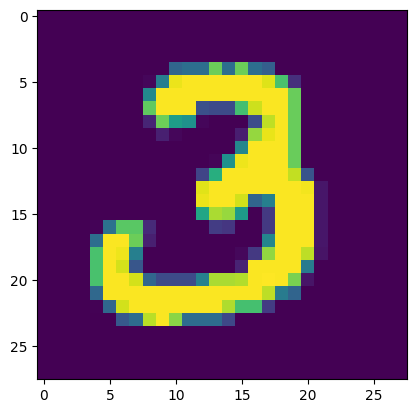

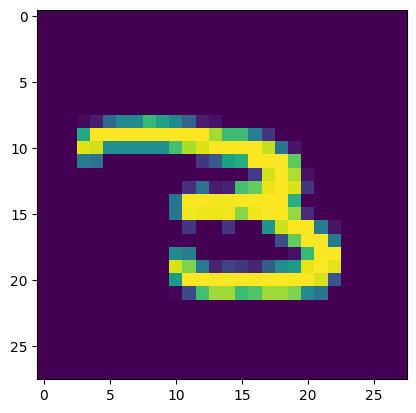

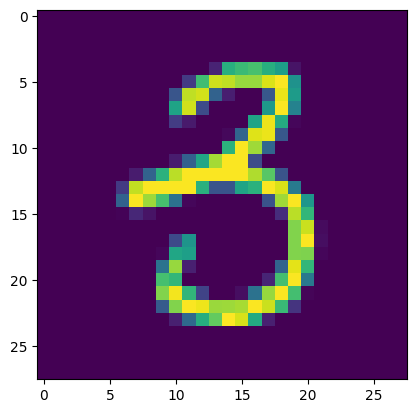

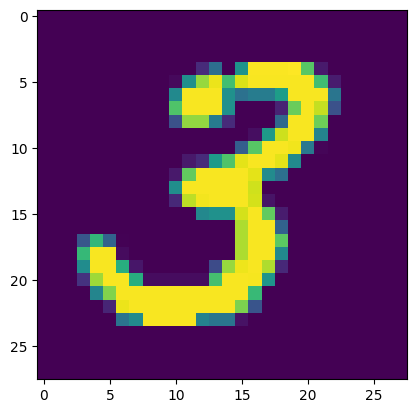

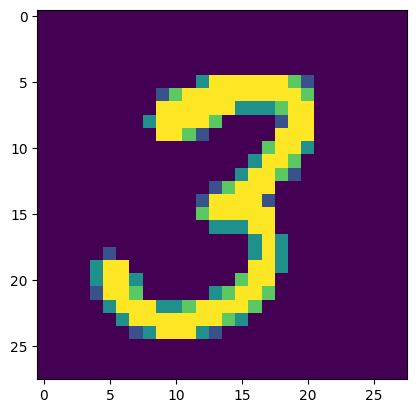

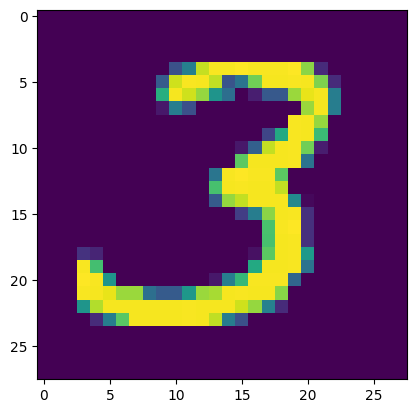

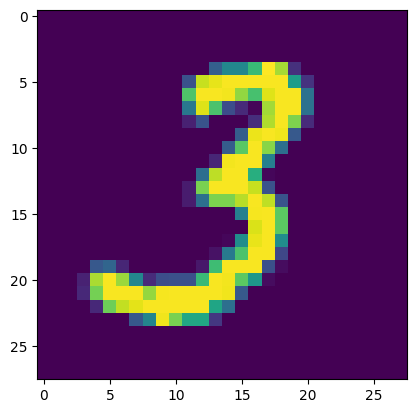

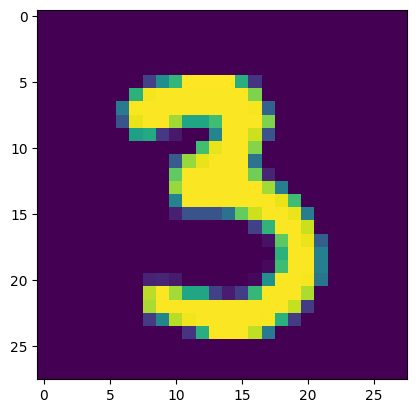

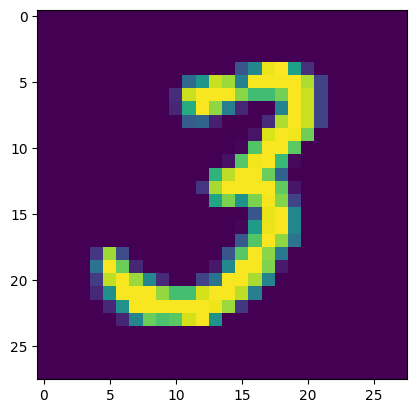

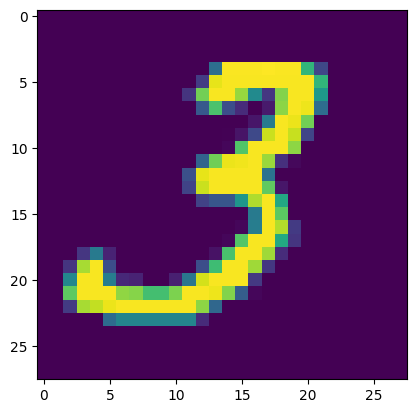

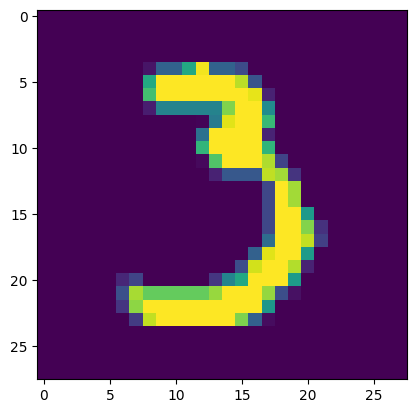

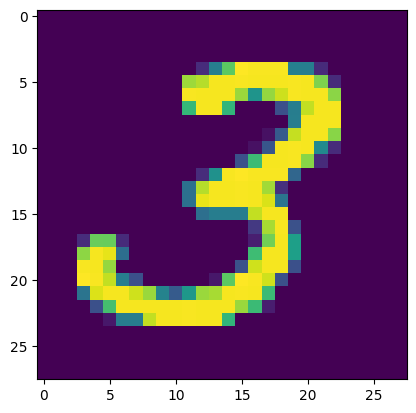

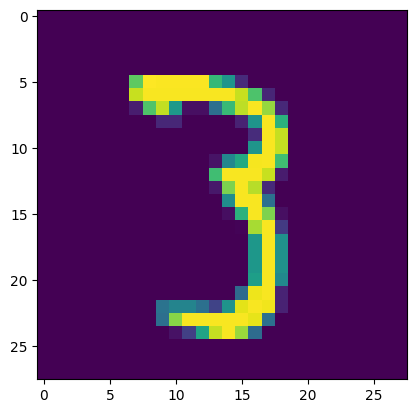

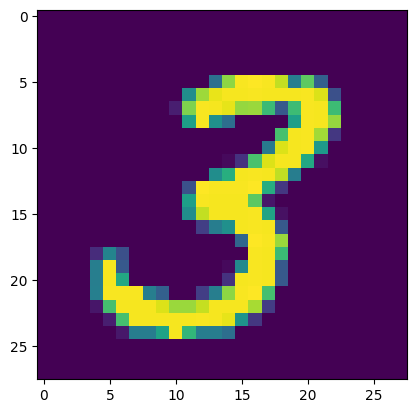

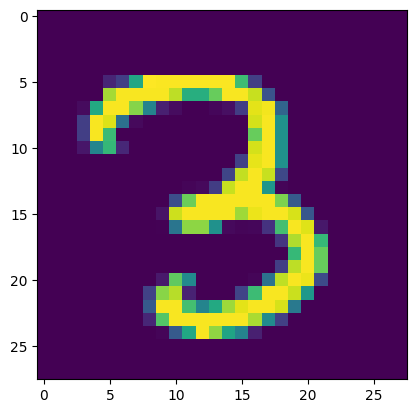

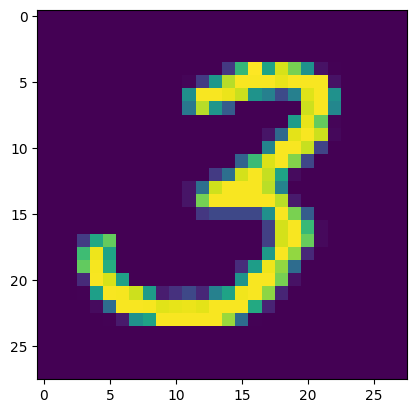

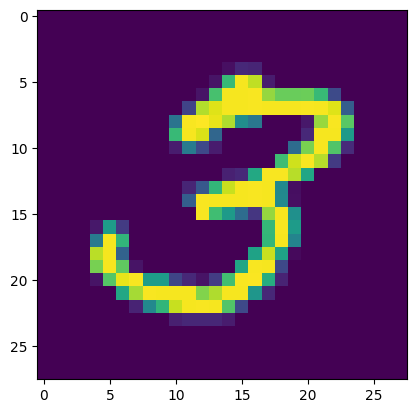

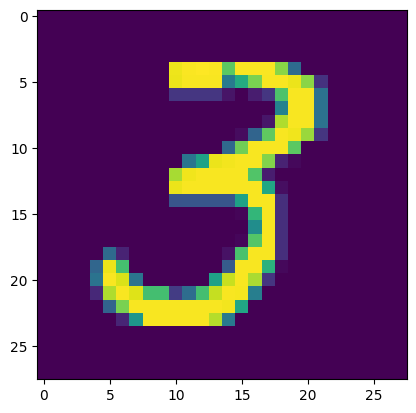

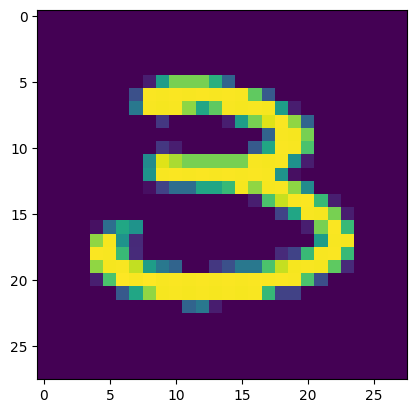

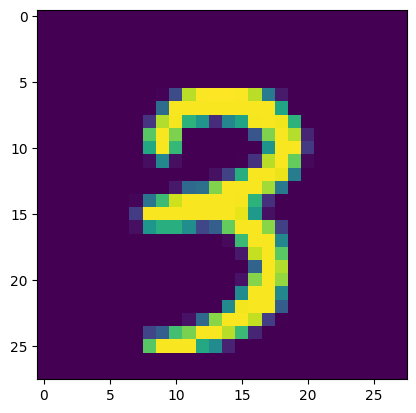

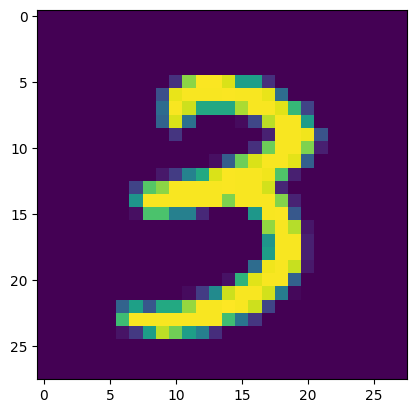

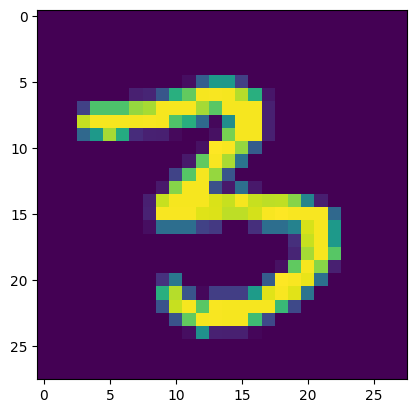

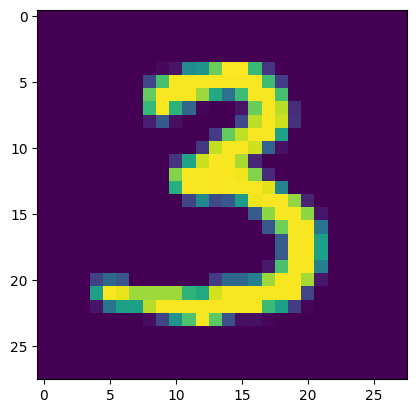

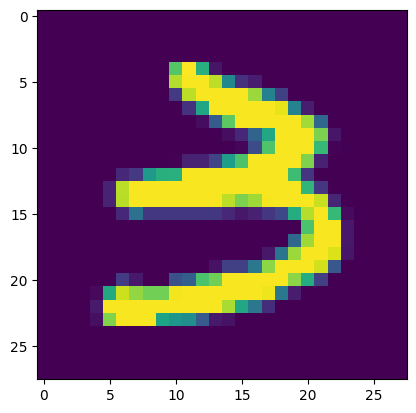

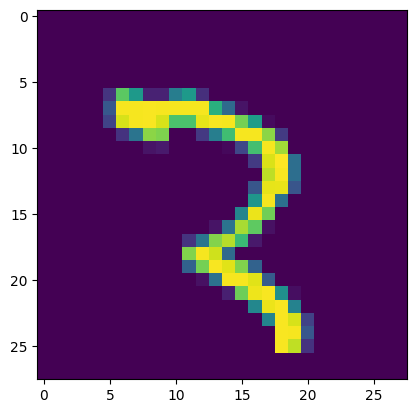

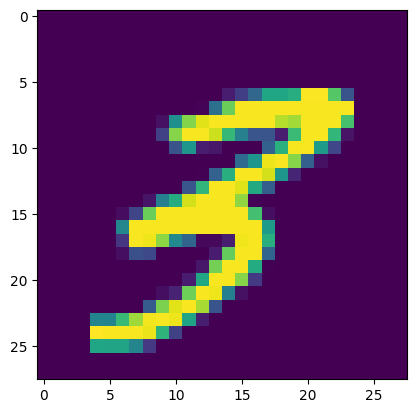

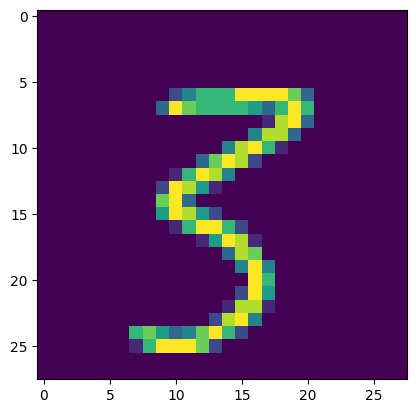

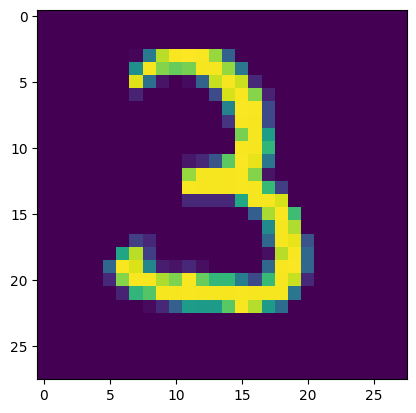

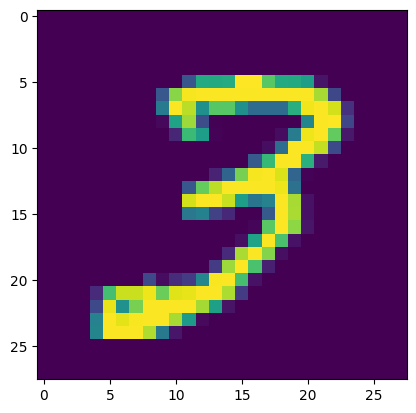

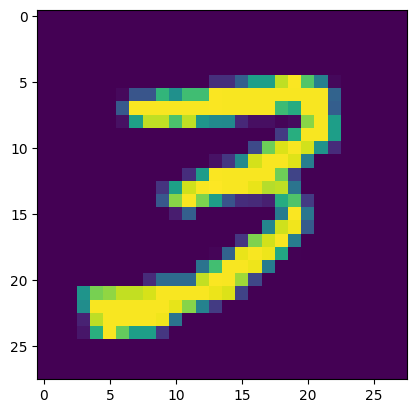

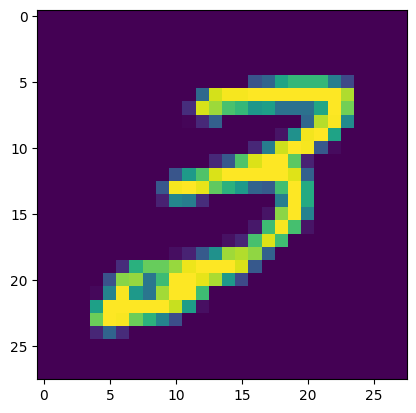

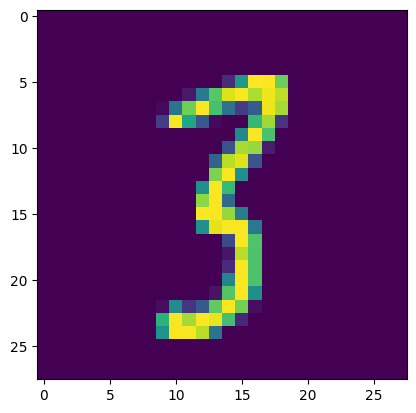

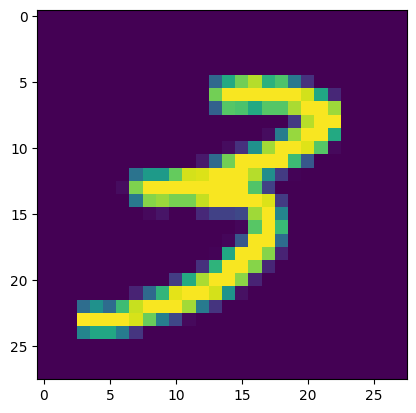

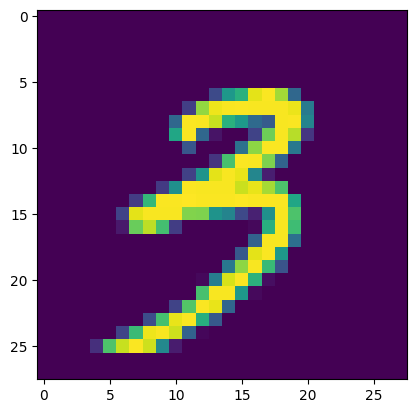

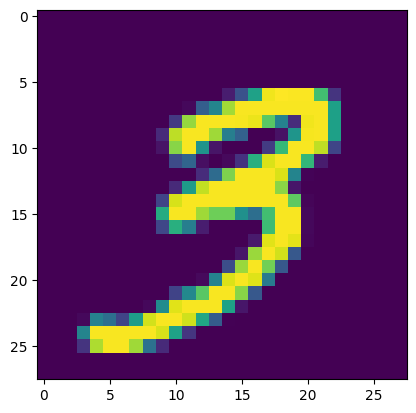

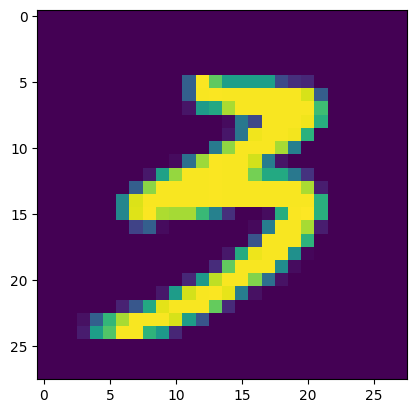

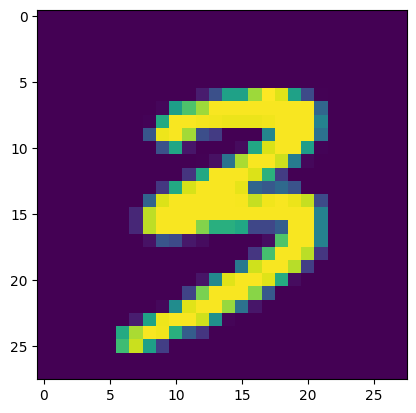

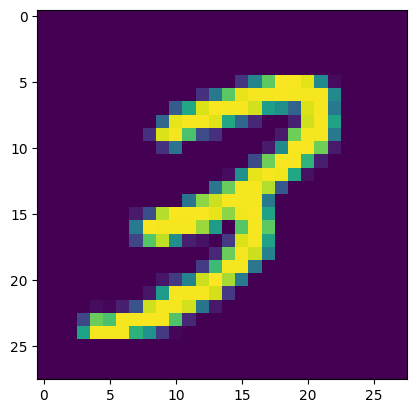

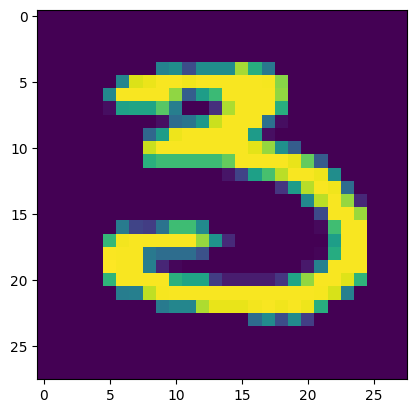

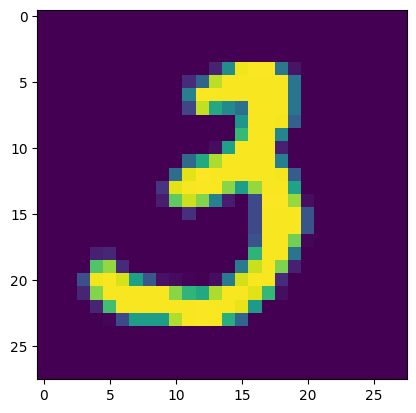

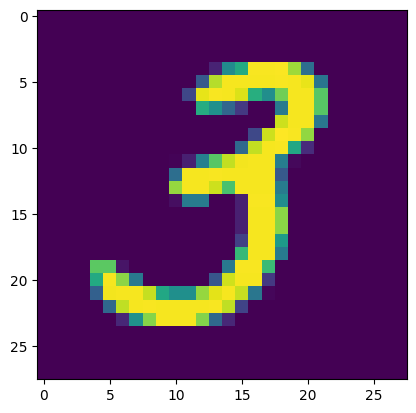

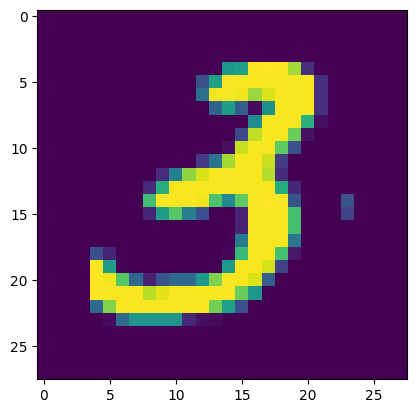

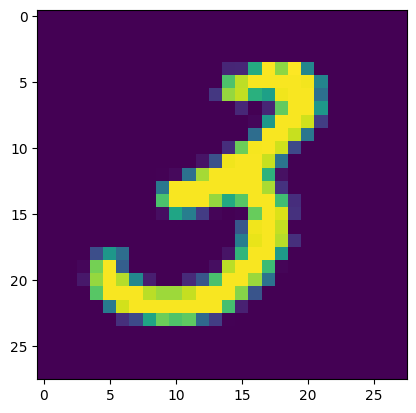

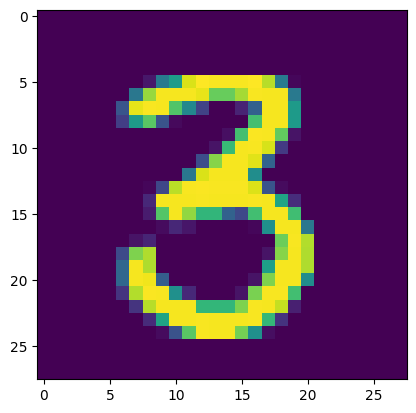

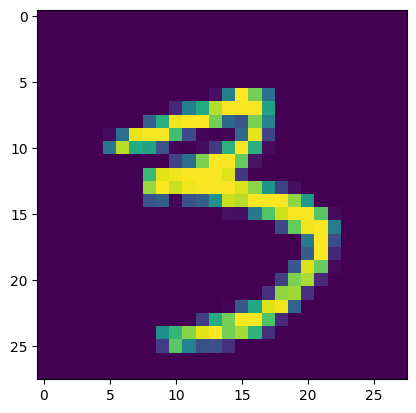

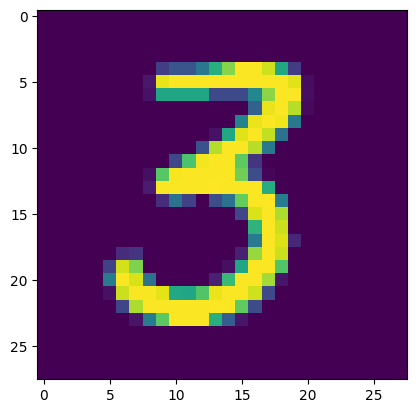

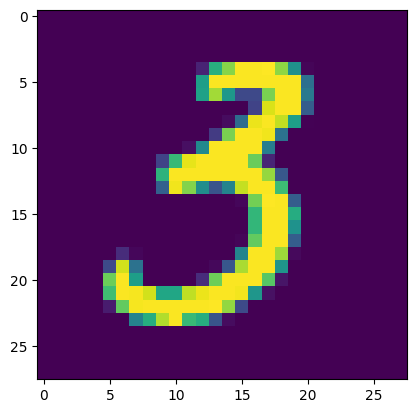

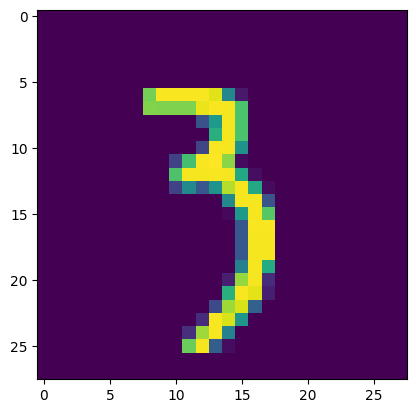

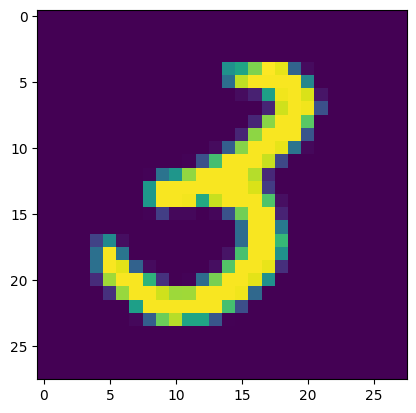

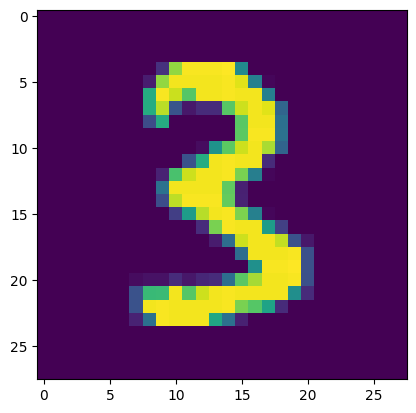

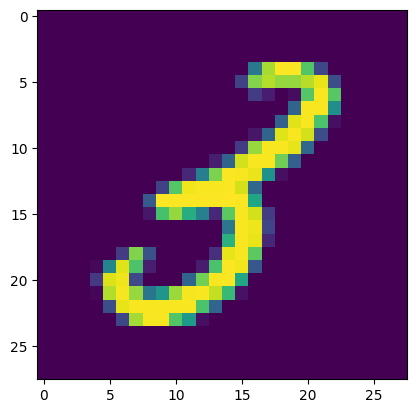

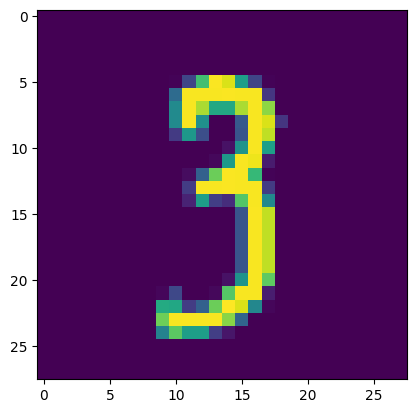

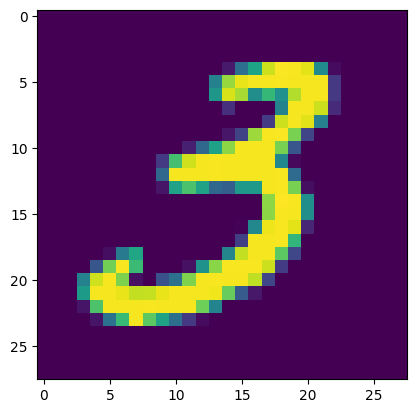

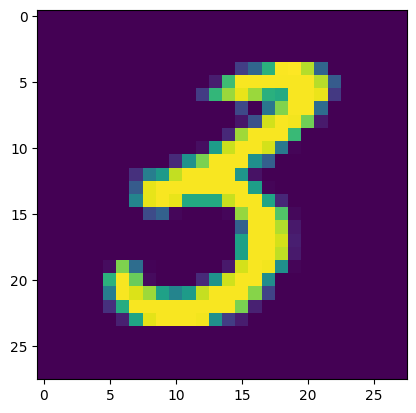

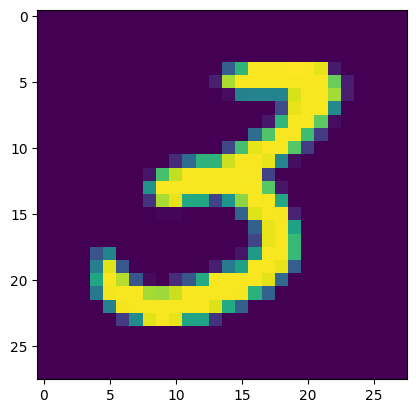

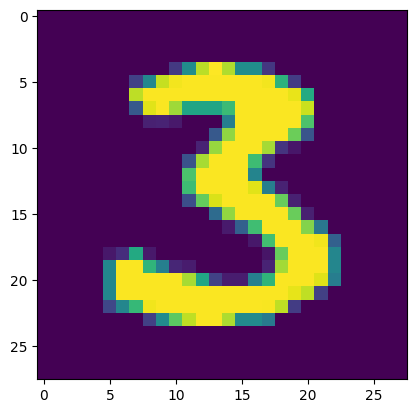

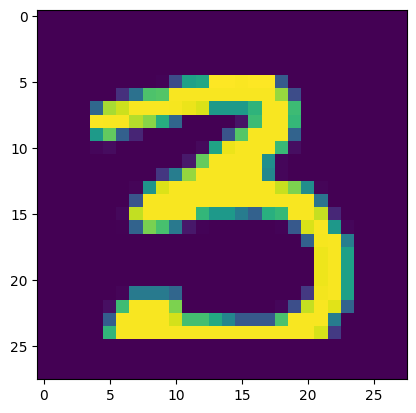

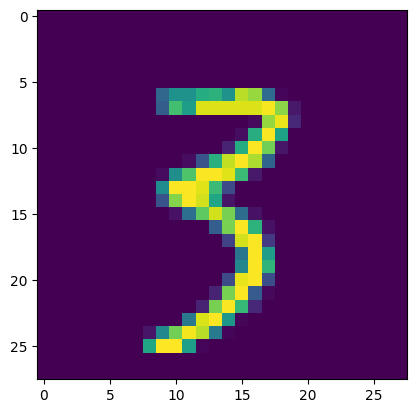

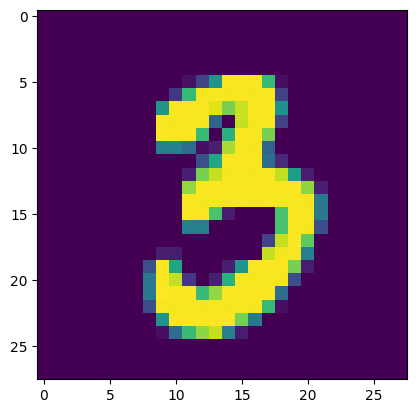

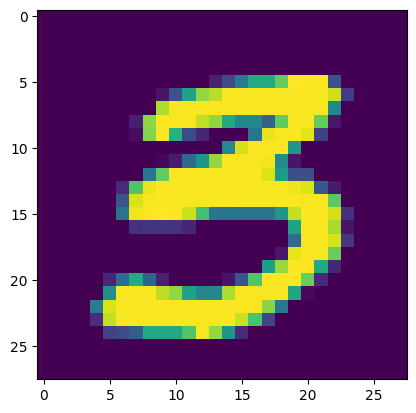

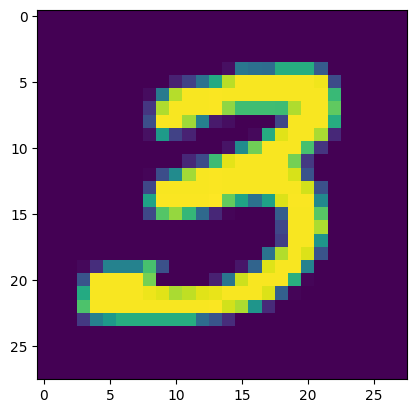

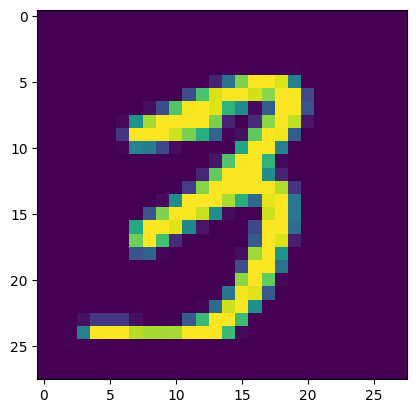

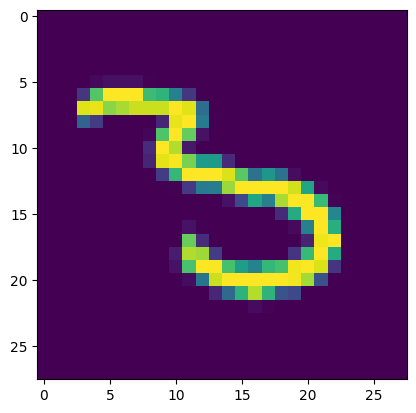

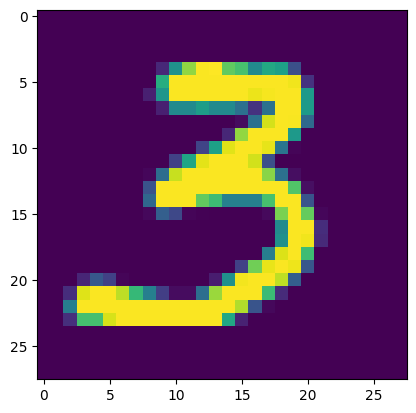

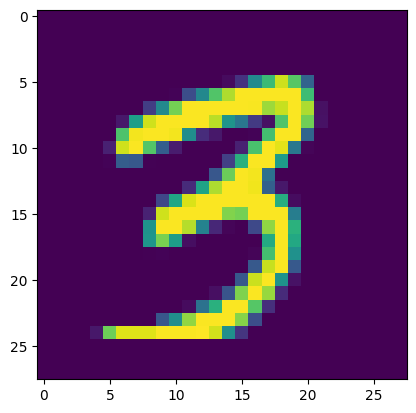

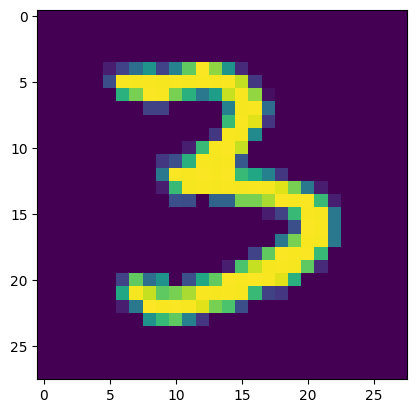

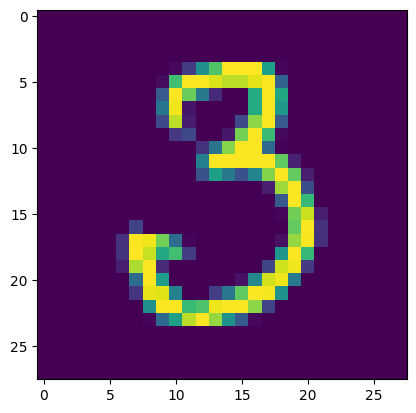

In [ ]:
for i in range(1000):
  if y_train[i] == 3:
    plt.imshow(x_train[i])
    plt.show()

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the CNN model
neural_net = tf.keras.Sequential([
    layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Conv2D(64, (5, 5), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')  # 10 units for MNIST
])

# Compile the model
neural_net.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
neural_net.summary()

# Train the model
model_history = neural_net.fit(x_train, y_train, validation_split=0.2, batch_size=32, epochs=10)

# Evaluate the model
test_loss, test_accuracy = neural_net.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     3,212,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,274,634 (12.49 MB)

 Trainable params: 3,274,634 (12.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 164s 108ms/step - accuracy: 0.9135 - loss: 0.2641 - val_accuracy: 0.9867 - val_loss: 0.0434
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 200s 107ms/step - accuracy: 0.9865 - loss: 0.0443 - val_accuracy: 0.9882 - val_loss: 0.0412
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 202s 107ms/step - accuracy: 0.9907 - loss: 0.0290 - val_accuracy: 0.9871 - val_loss: 0.0428
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 202s 107ms/step - accuracy: 0.9926 - loss: 0.0226 - val_accuracy: 0.9877 - val_loss: 0.0439
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 203s 107ms/step - accuracy: 0.9947 - loss: 0.0152 - val_accuracy: 0.9923 - val_loss: 0.0314
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 158s 105ms/step - accuracy: 0.9962 - loss: 0.0133 - val_accuracy: 0.9875 - val_loss: 0.0525
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 203s 106ms/step - accuracy: 0.9956 - loss: 0.0138 - val_accuracy: 0.9921 - val_loss: 0.0433
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 159s 106ms/step - ac

Text(0, 0.5, 'accuracy')

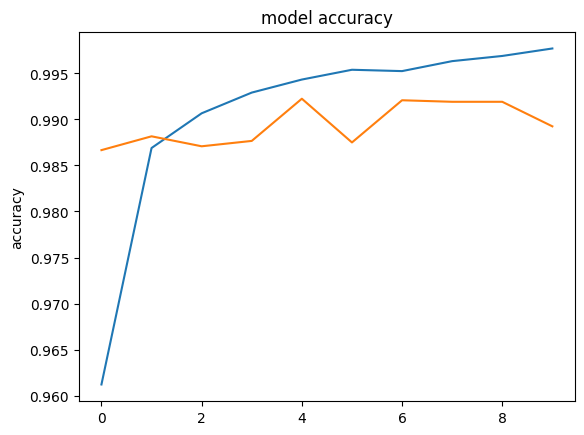

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

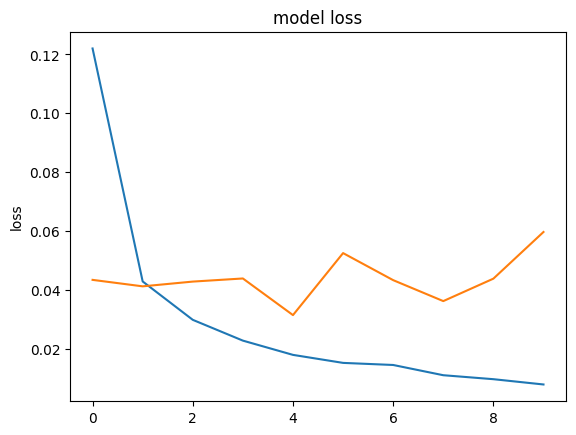

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

This notebook demonstrates the implementation of a Convolutional Neural Network (CNN) using TensorFlow and Keras to classify handwritten digits from the MNIST dataset.

The notebook performs the following steps:

1.  **Load and Preprocess Data**: Loads the MNIST dataset, which consists of 60,000 training images and 10,000 test images of handwritten digits. The images are then preprocessed by reshaping them to include a channel dimension and normalizing the pixel values to the range [0, 1]. The labels are also converted to one-hot encoded format.
2.  **Define the CNN Model**: Defines a sequential CNN model with convolutional layers, max pooling layers, a flatten layer, and dense layers. A dropout layer is included for regularization.
3.  **Compile the Model**: Compiles the model using the Adam optimizer, categorical crossentropy loss function, and accuracy as the evaluation metric.
4.  **Train the Model**: Trains the model on the training data for a specified number of epochs, with a validation split to monitor performance during training.
5.  **Evaluate the Model**: Evaluates the trained model on the test data to measure its performance.
6.  **Visualize Training History**: Plots the training and validation accuracy and loss over epochs to visualize the model's learning progress.